In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


1.Exploratory Data Analysis
Objectif: 1
- Comprendre du mieux possible nos données.
- Développer une premiere stratégie de modélisation

Checklist de Base
Analyse de Forme:
- variable target: Charge
- ligne de colonnes: 7
- ligne de variable 

In [44]:

dataset_path = "Dataset_Brief.csv"
df = pd.read_csv(dataset_path)

In [45]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Supprimer les lignes avec des valeurs manquantes
# df = df.dropna()

# Remplacer les valeurs manquantes par la moyenne
# df['colonne'] = df['colonne'].fillna(df['colonne'].mean())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [46]:
#duplicates
duplicates = df.duplicated()
duplicates_data = df[duplicates]
#
print("\nLignes avec des duplicatas:")
print(duplicates_data)
#
df = df.drop_duplicates(subset=["age", "sex", "bmi", "children", "smoker", "region"], keep='first')
#
print("\nAprès vérification de duplicatas:")
print(df.head())
df.shape[0]


Lignes avec des duplicatas:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

Après vérification de duplicatas:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


1335

In [47]:
df['age'] = df['age'].astype(int)
df['bmi'] = df['bmi'].astype(float)
df['charges'] = df['charges'].astype(float).round(2)
df['sex'].replace(['male', 'female'], [0,1], inplace=True)
df['smoker'].replace(['no', 'yes'], [0,1], inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92
1,18,0,33.770,1,0,southeast,1725.55
2,28,0,33.000,3,0,southeast,4449.46
3,33,0,22.705,0,0,northwest,21984.47
4,32,0,28.880,0,0,northwest,3866.86


In [48]:
df['NordOuest'] = df['region'].str.contains('northwest').astype(int)
df['NordEast'] = df['region'].str.contains('northeast').astype(int)
df['SudOuest'] = df['region'].str.contains('southwest').astype(int)
df['SudEast'] = df['region'].str.contains('southeast').astype(int)
df = df.drop('region', axis=1)

df = df[['age','sex','bmi','children','smoker','NordOuest','NordEast','SudOuest','SudEast','charges']]
df.head()

,age,sex,bmi,children,smoker,NordOuest,NordEast,SudOuest,SudEast,charges
0,19,1,27.900,0,1,0,0,1,0,16884.92
1,18,0,33.770,1,0,0,0,0,1,1725.55
2,28,0,33.000,3,0,0,0,0,1,4449.46
3,33,0,22.705,0,0,1,0,0,0,21984.47
4,32,0,28.880,0,0,1,0,0,0,3866.86


In [49]:
df.describe()

,age,sex,bmi,children,smoker,NordOuest,NordEast,SudOuest,SudEast,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,39.253933,0.494382,30.658157,1.097378,0.205243,0.242697,0.241948,0.243446,0.271910,13286.778232
std,14.030779,0.500156,6.101456,1.205727,0.404031,0.428874,0.428423,0.429323,0.445111,12115.615169
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4746.695000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9386.160000
75%,51.000000,1.000000,34.687500,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16717.010000
max,64.000000,1.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,63770.430000


<AxesSubplot:>

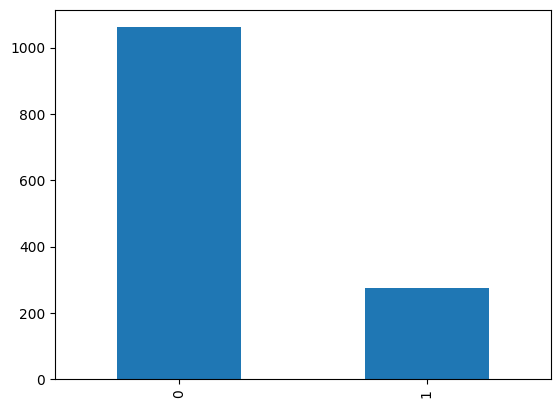

In [50]:
df['smoker'].value_counts().plot.bar()

In [51]:
plt.figure(figsize=(10, 10))
sns.barplot(x='sex', y='charges', data=df, estimator='mean')


plt.title('Moyenne des charges en fonction du sexe')
plt.xlabel('Sexe')
plt.ylabel('Moyenne des charges')

plt.show()

TypeError: 'str' object is not callable

<Figure size 1000x1000 with 0 Axes>

<Axes: xlabel='children'>

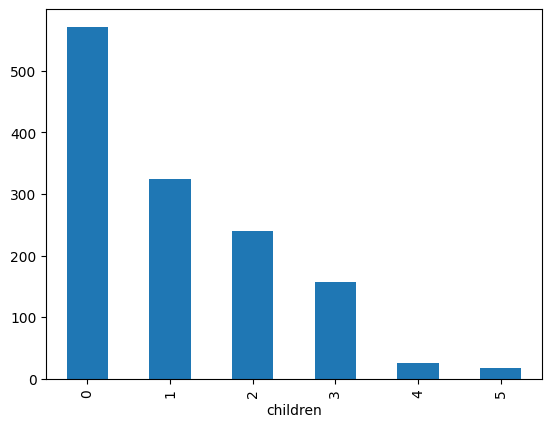

In [ ]:
df['children'].value_counts().plot.bar()

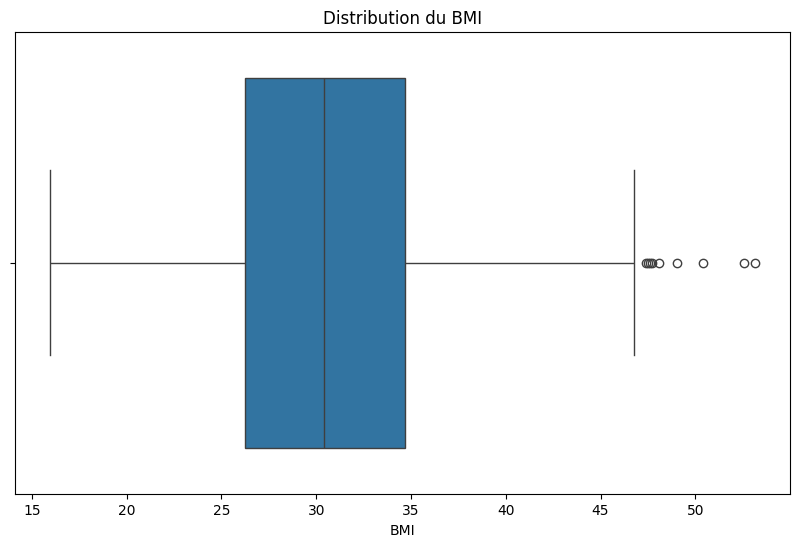

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi', data=df)

# Ajout de titres et d'étiquettes
plt.title('Distribution du BMI')
plt.xlabel('BMI')

# Affichage du graphique
plt.show()

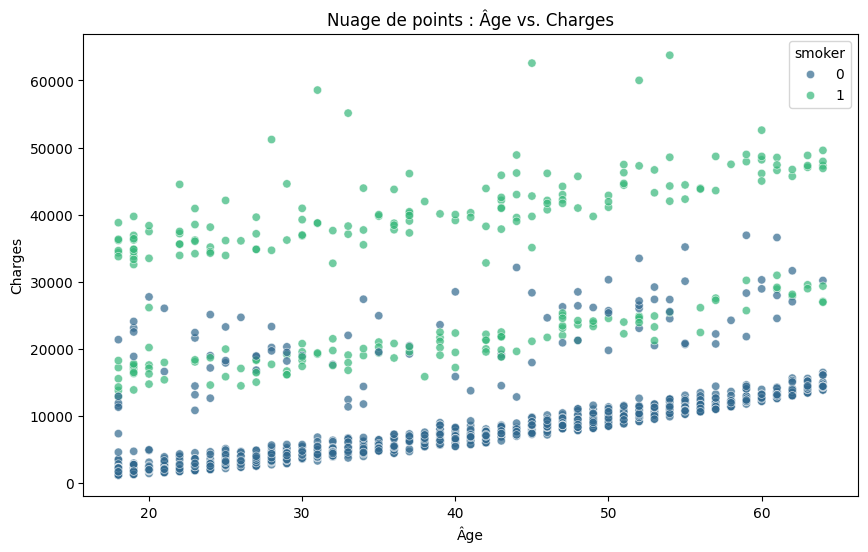

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='viridis', alpha=0.7)

# Ajout de titres et d'étiquettes
plt.title('Nuage de points : Âge vs. Charges')
plt.xlabel('Âge')
plt.ylabel('Charges')

# Affichage du graphique
plt.show()

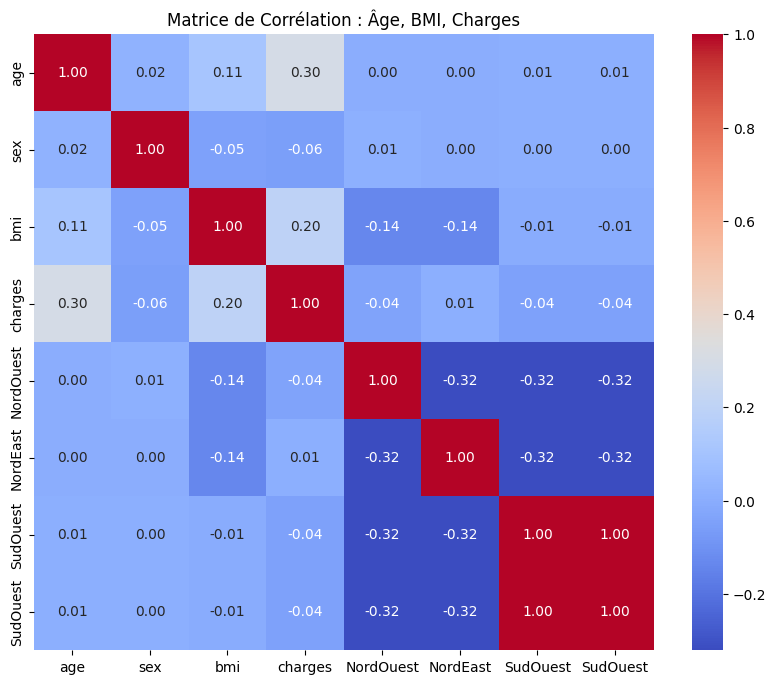

In [ ]:
# Sélection des colonnes pertinentes
cols = ['age', 'sex','bmi', 'charges', 'NordOuest', 'NordEast', 'SudOuest','SudOuest']

# Création de la matrice de corrélation
correlation_matrix = df[cols].corr()

# Création d'une heatmap pour visualiser la corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Ajout de titres
plt.title('Matrice de Corrélation : Âge, BMI, Charges')

# Affichage de la heatmap
plt.show()

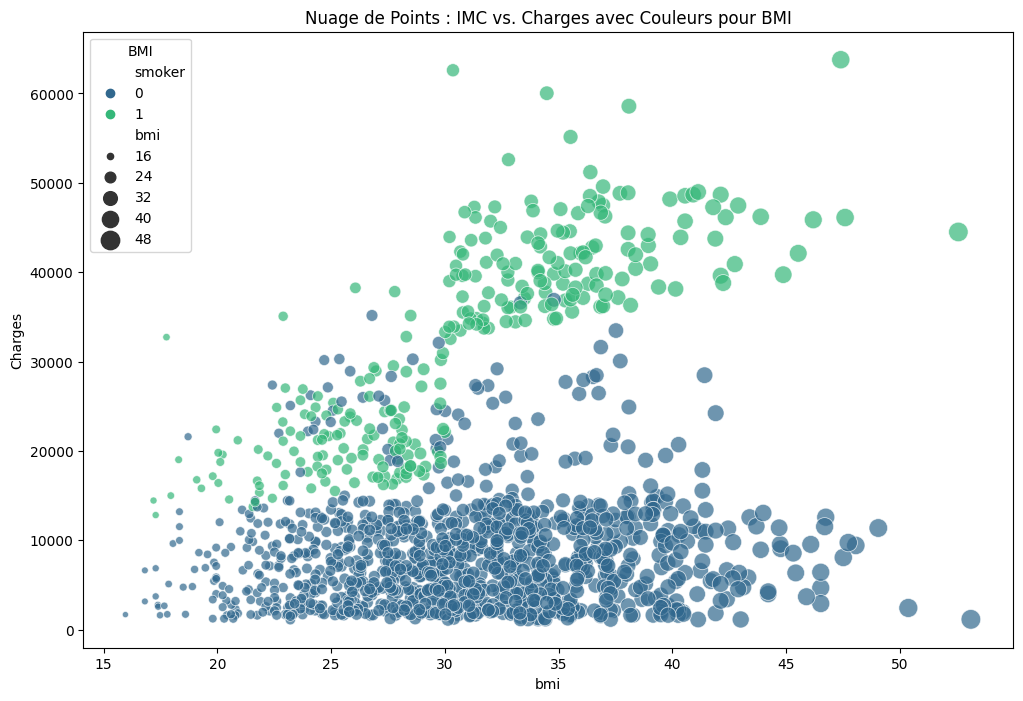

In [ ]:
# Création d'un nuage de points avec des couleurs pour le BMI
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='bmi', y='charges',hue='smoker',  palette='viridis', data=df, size='bmi', sizes=(20, 200), alpha=0.7)

# Ajout de titres
plt.title('Nuage de Points : IMC vs. Charges avec Couleurs pour BMI')
plt.xlabel('bmi')
plt.ylabel('Charges')

# Ajout d'une légende pour la taille des points (BMI)
scatter_plot.legend(title='BMI')

# Affichage du graphique
plt.show()

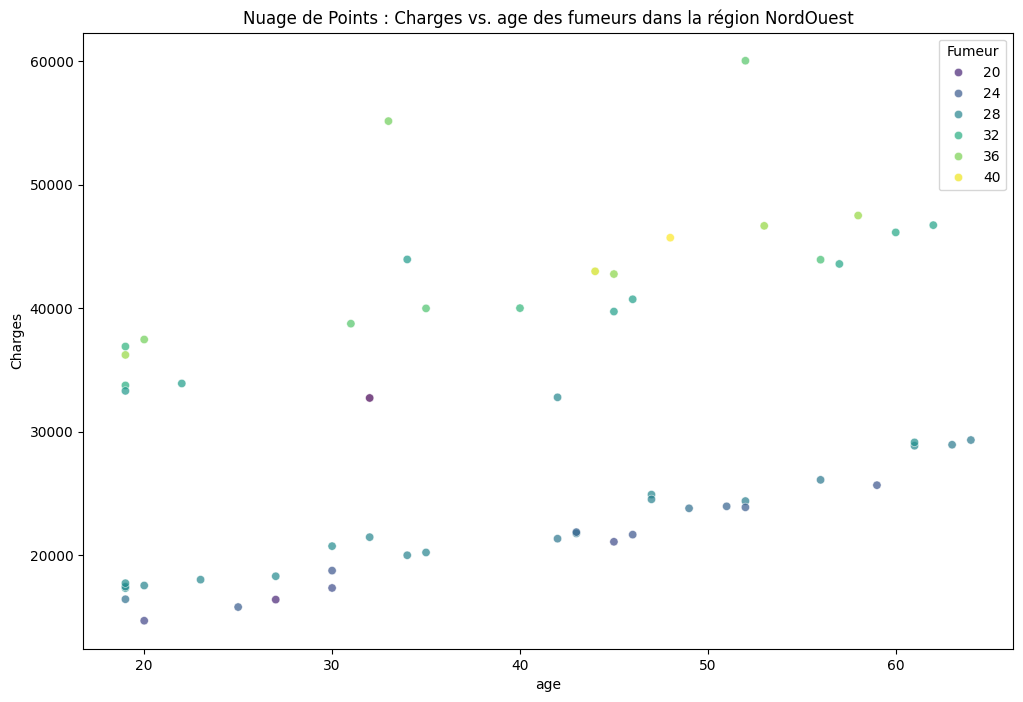

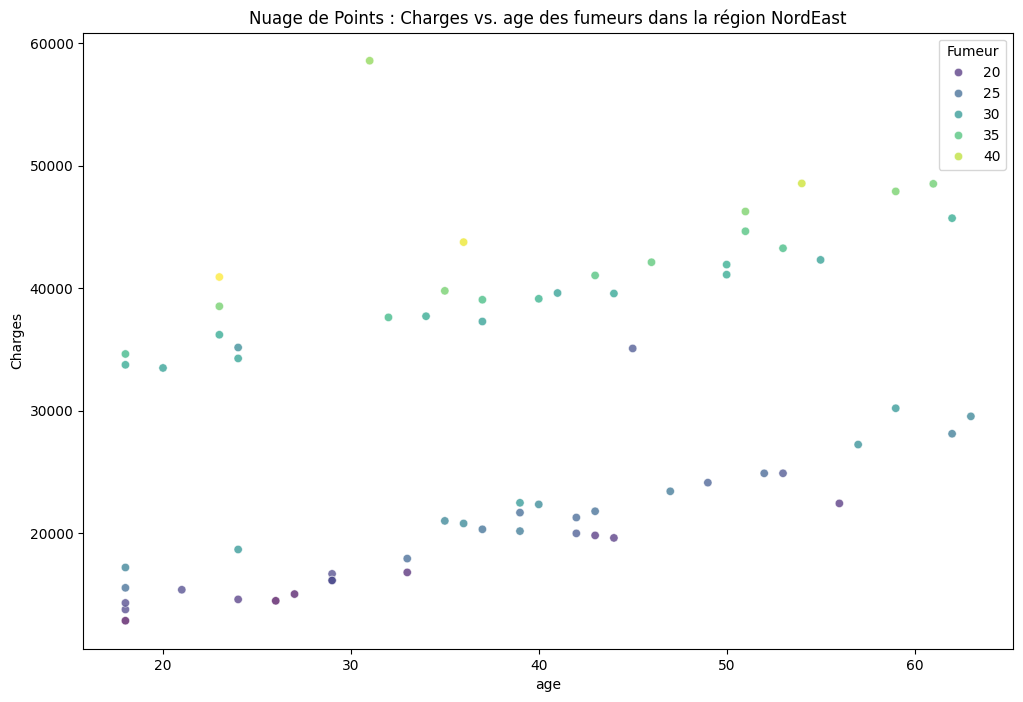

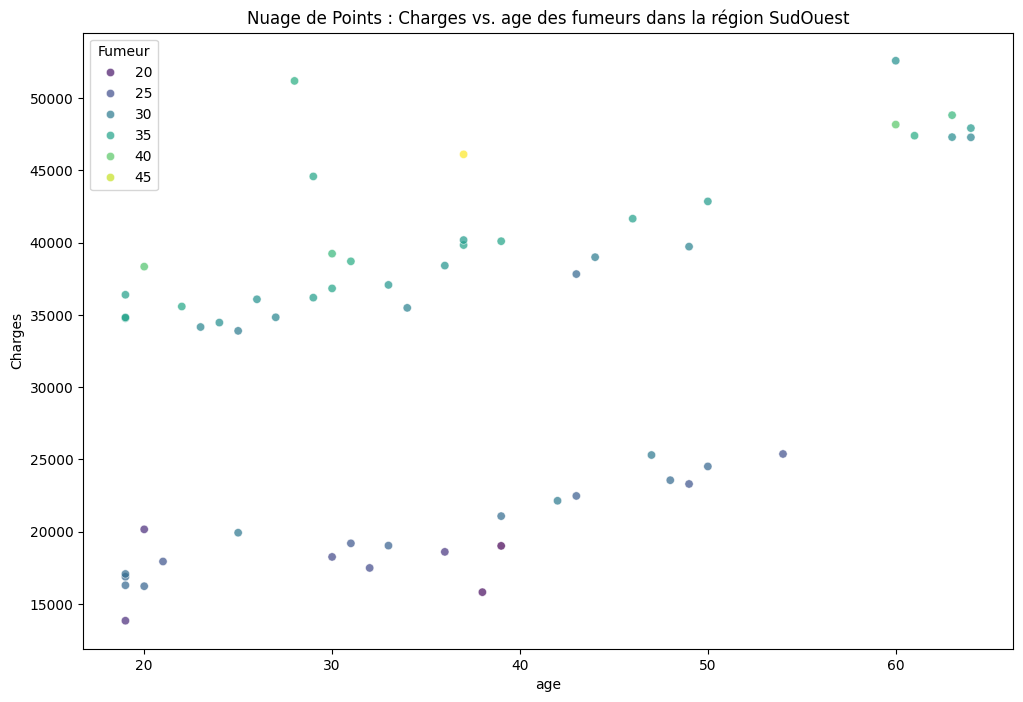

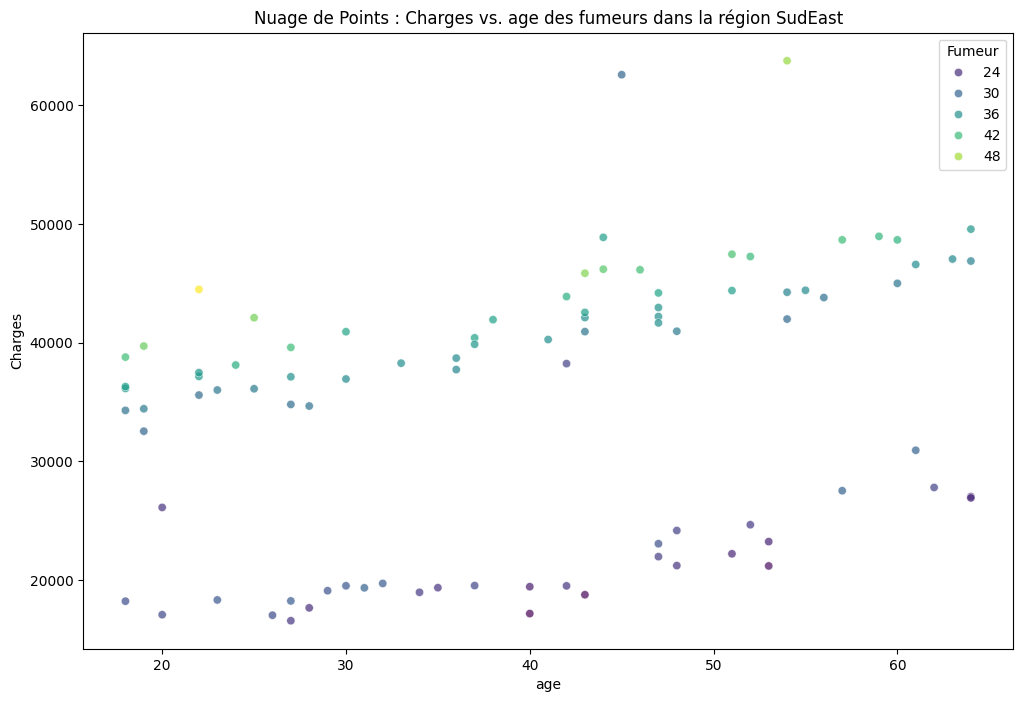

In [ ]:
regions = ['NordOuest', 'NordEast', 'SudOuest', 'SudEast']

for region in regions:
    
    data_subset = df[(df[region] == 1) & (df['smoker'] == 1)]

    plt.figure(figsize=(12, 8))
    scatter_plot = sns.scatterplot(x='age', y='charges', hue='bmi', palette='viridis', data=data_subset, sizes=(20, 200), alpha=0.7)

    plt.title(f'Nuage de Points : Charges vs. age des fumeurs dans la région {region}')
    plt.xlabel('age')
    plt.ylabel('Charges')

    scatter_plot.legend(title='Fumeur')
    plt.show()

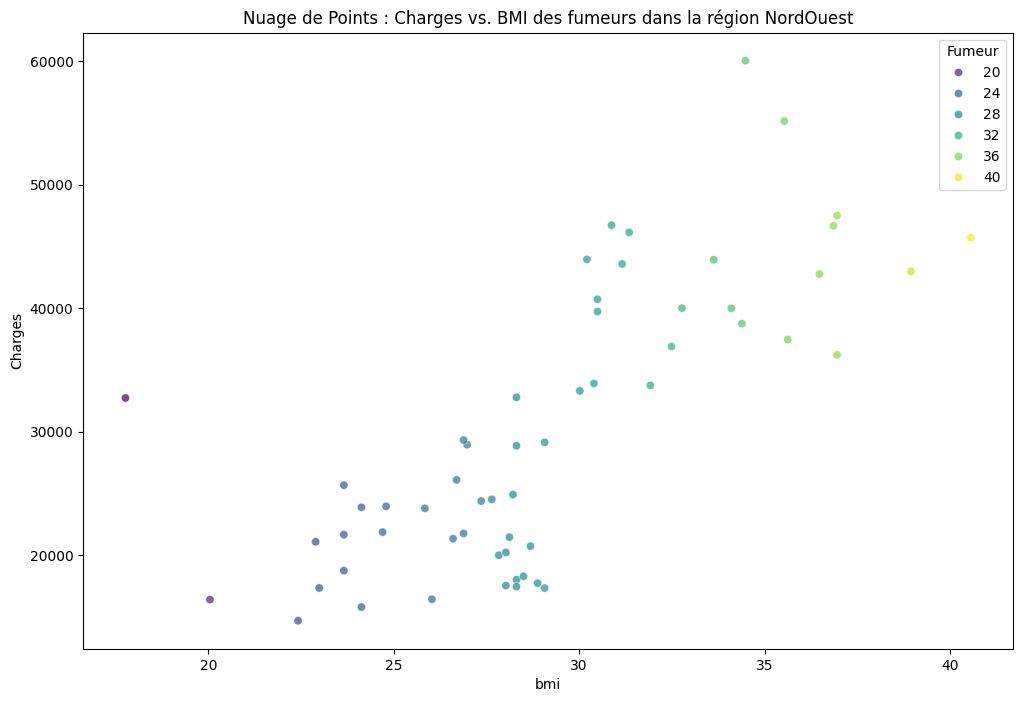

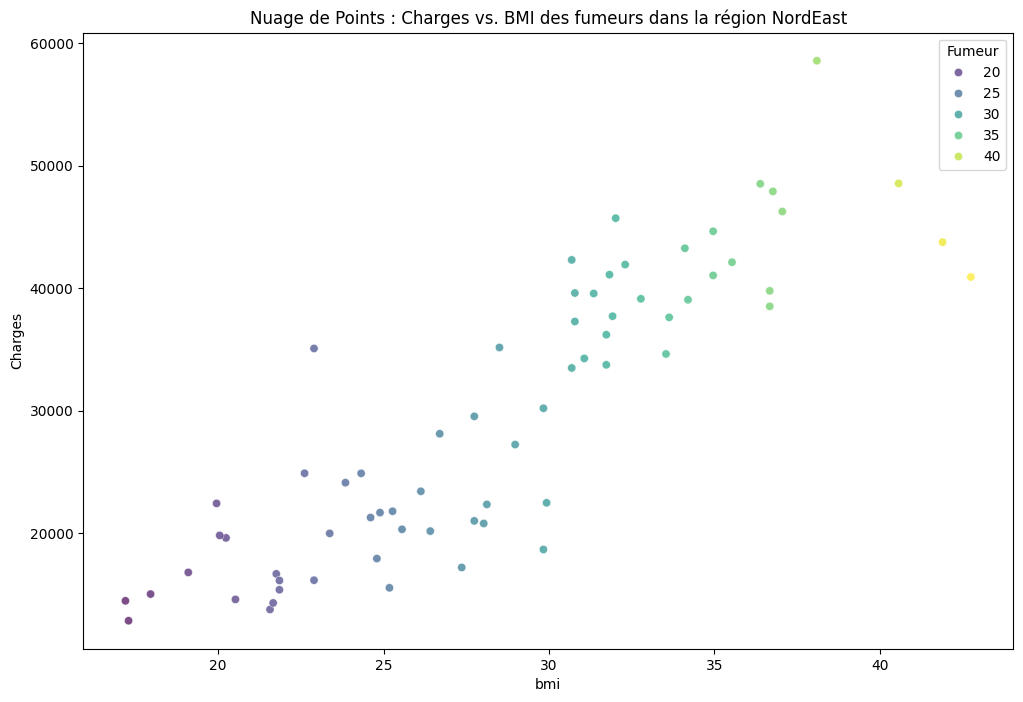

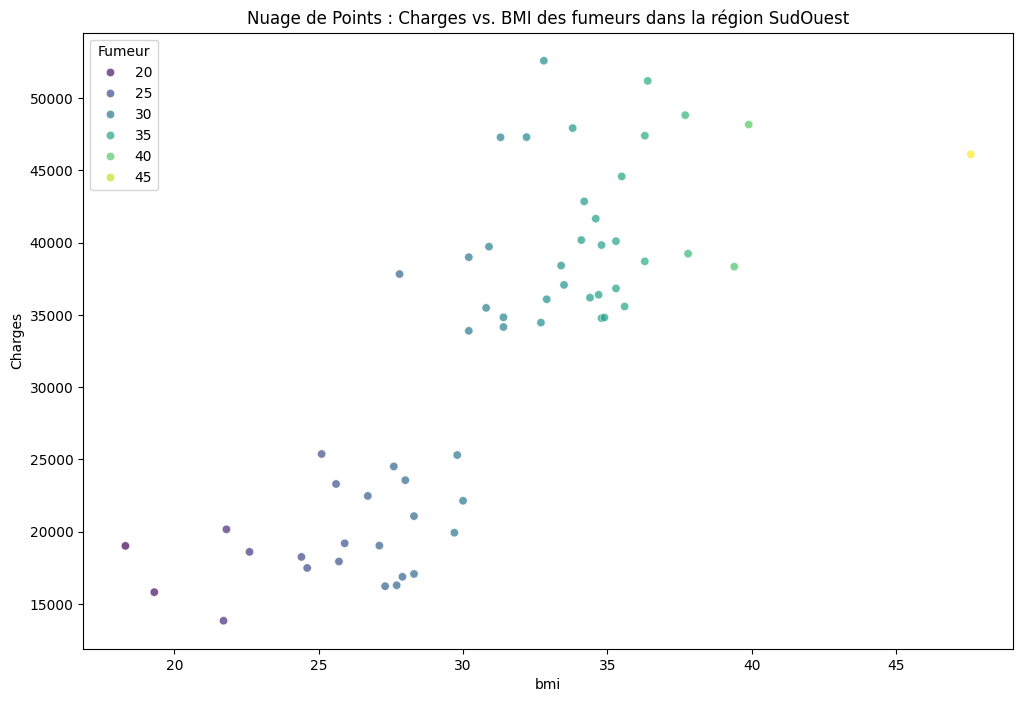

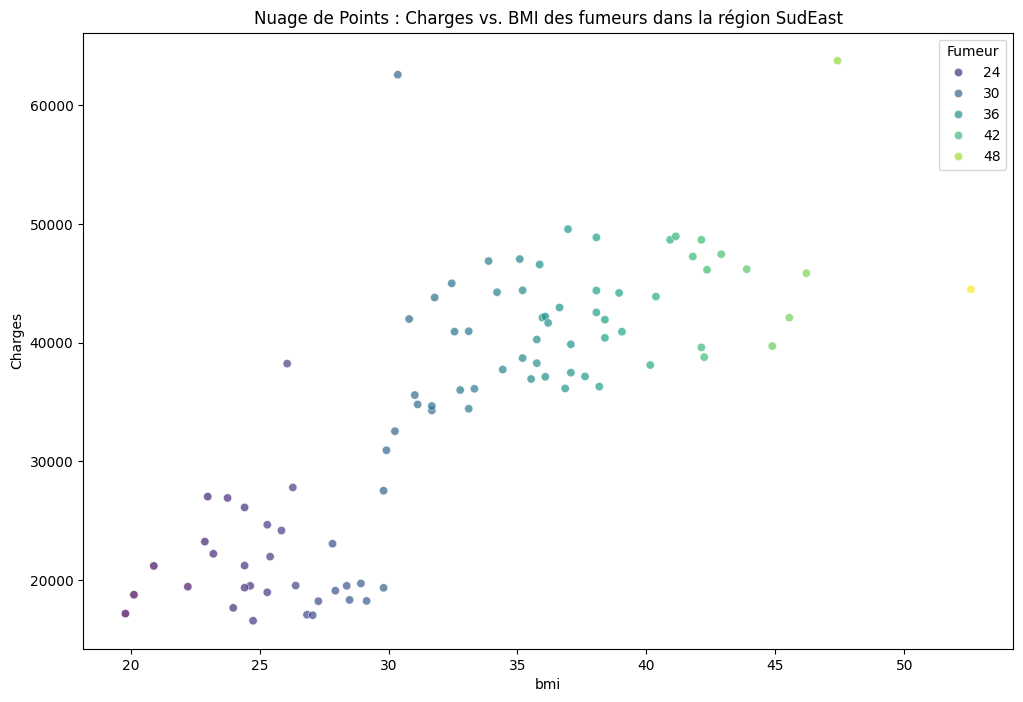

In [ ]:
regions = ['NordOuest', 'NordEast', 'SudOuest', 'SudEast']

for region in regions:
    
    data_subset = df[(df[region] == 1) & (df['smoker'] == 1)]

    plt.figure(figsize=(12, 8))
    scatter_plot = sns.scatterplot(x='bmi', y='charges', hue='bmi', palette='viridis', data=data_subset, sizes=(20, 200), alpha=0.7)

    plt.title(f'Nuage de Points : Charges vs. BMI des fumeurs dans la région {region}')
    plt.xlabel('bmi')
    plt.ylabel('Charges')

    scatter_plot.legend(title='Fumeur')
    plt.show()

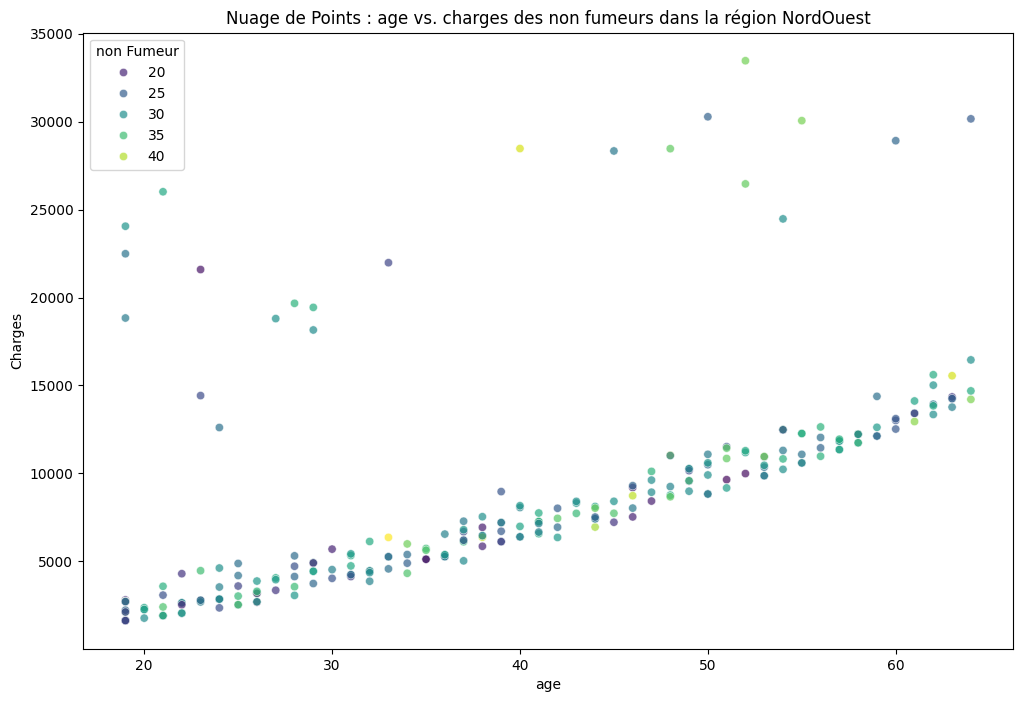

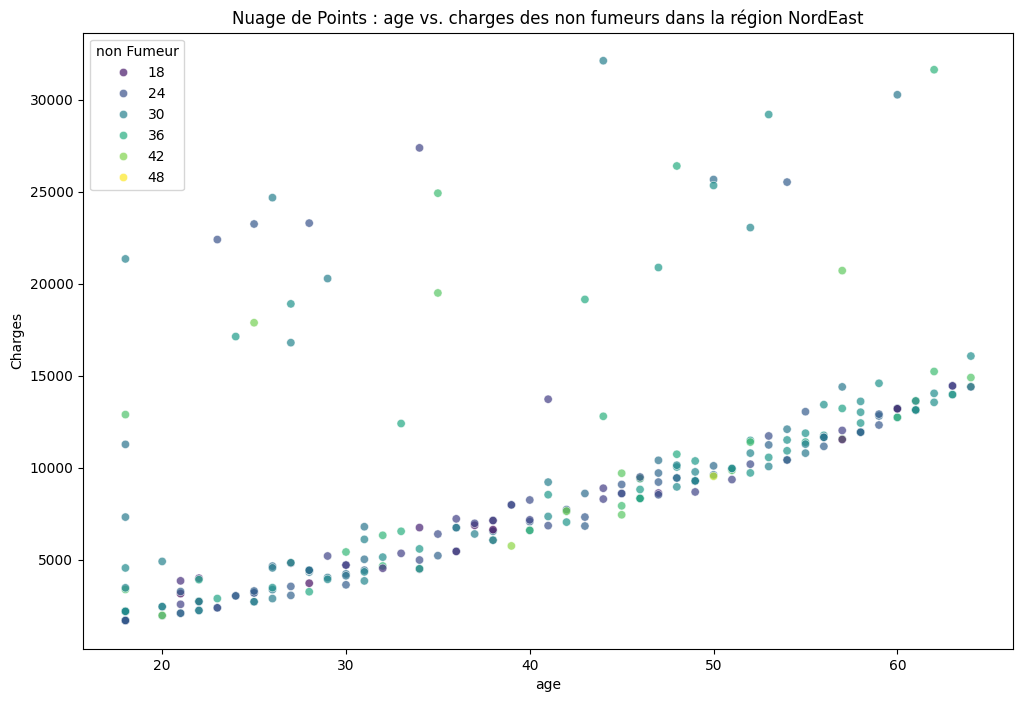

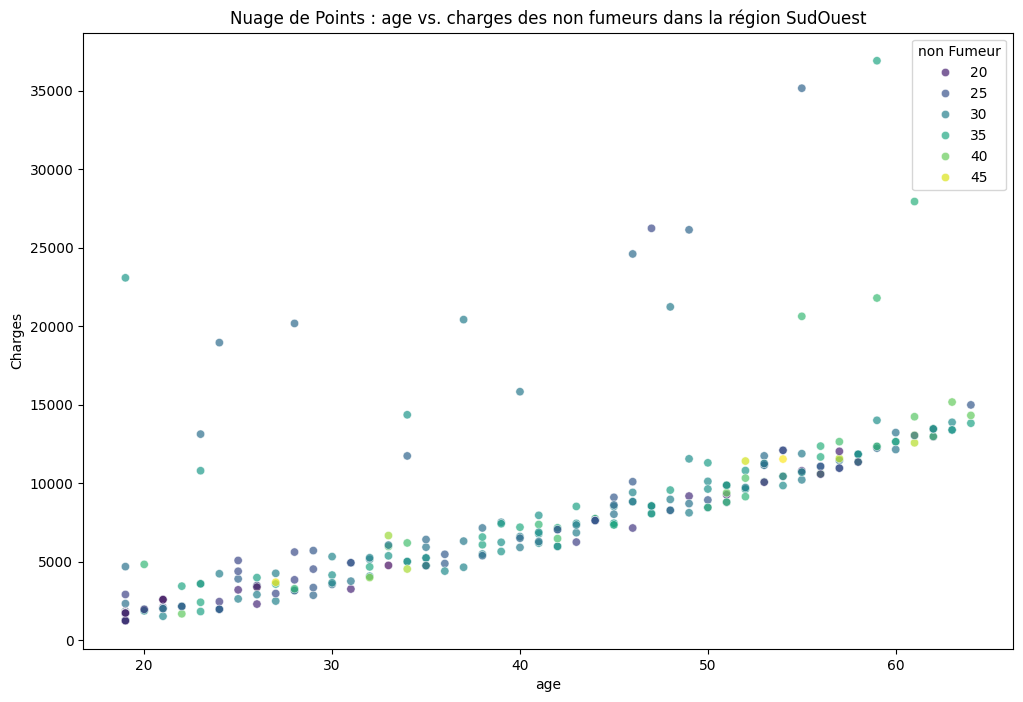

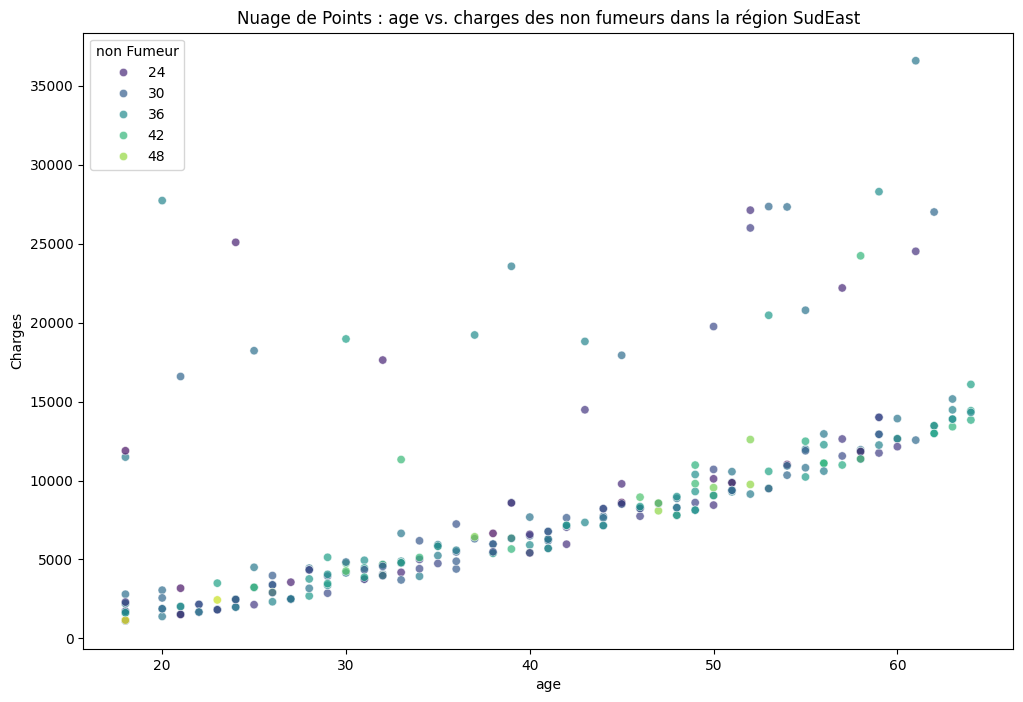

In [ ]:
regions = ['NordOuest', 'NordEast', 'SudOuest', 'SudEast']

for region in regions:
    
    data_subset = df[(df[region] == 1) & (df['smoker'] == 0)]

    plt.figure(figsize=(12, 8))
    scatter_plot = sns.scatterplot(x='age', y='charges', hue='bmi', palette='viridis', data=data_subset, sizes=(20, 200), alpha=0.7)

    plt.title(f'Nuage de Points : age vs. charges des non fumeurs dans la région {region}')
    plt.xlabel('age')
    plt.ylabel('Charges')

    scatter_plot.legend(title='non Fumeur')
    plt.show()

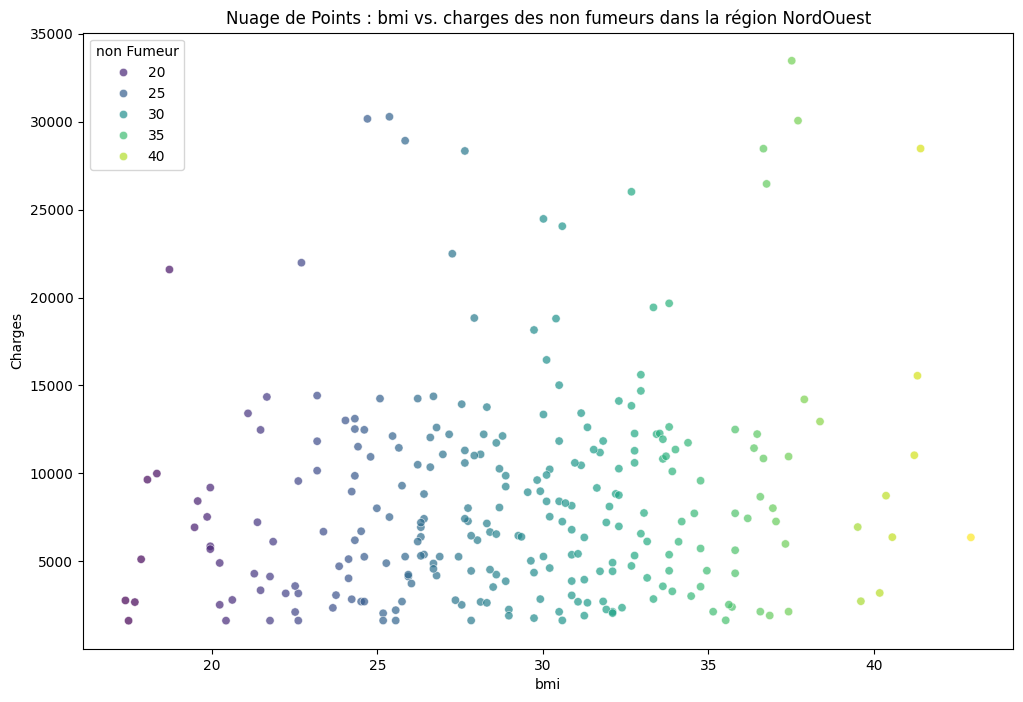

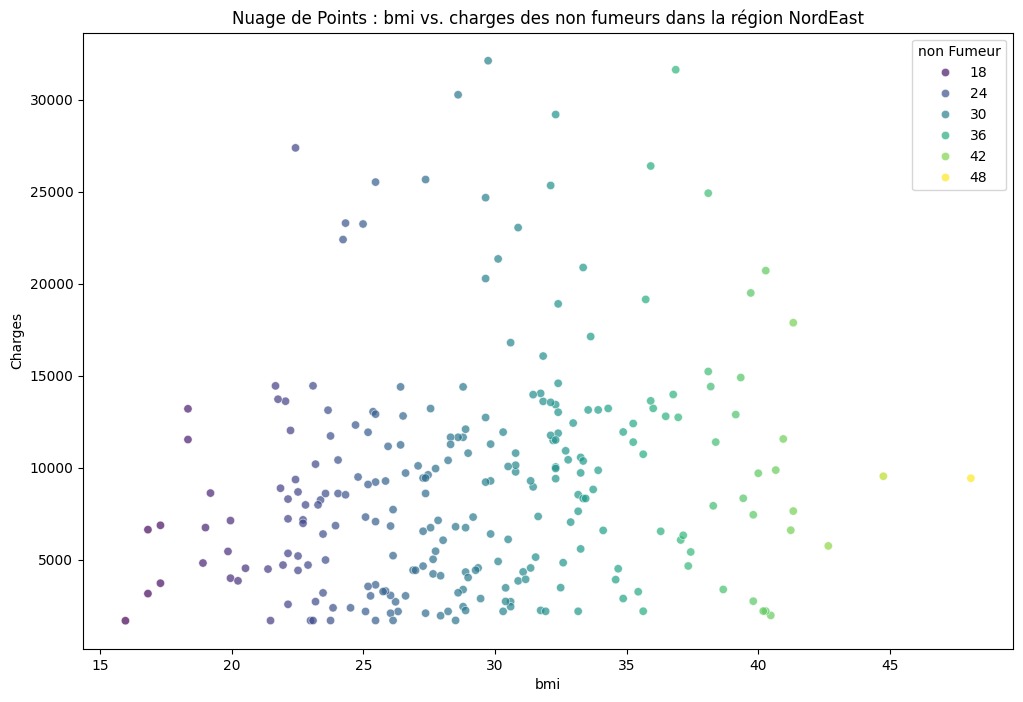

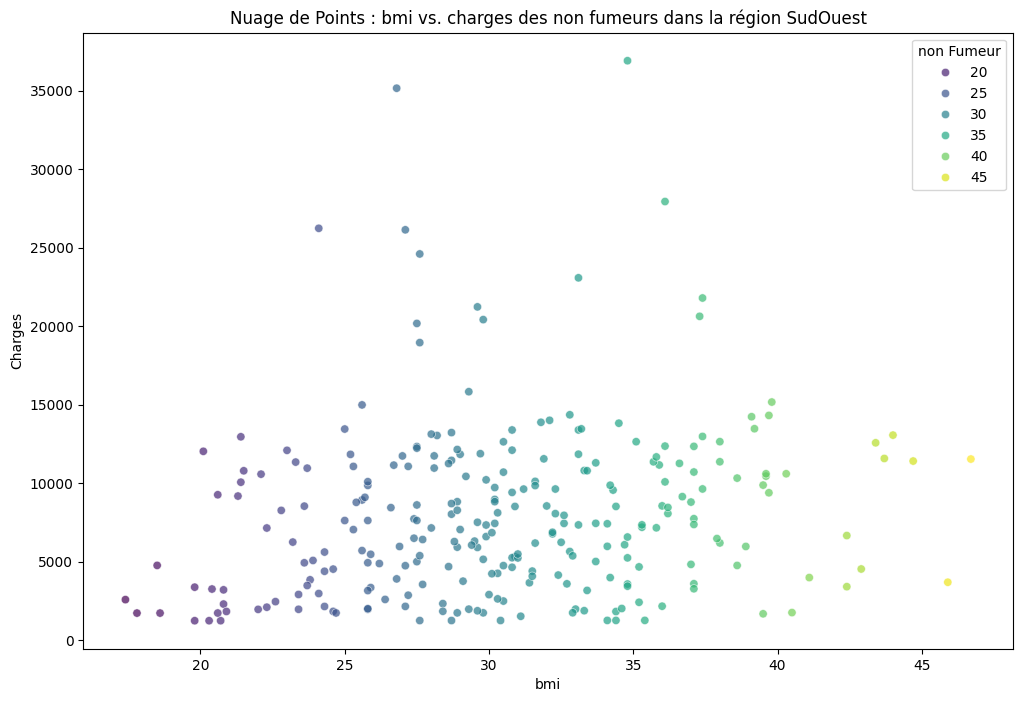

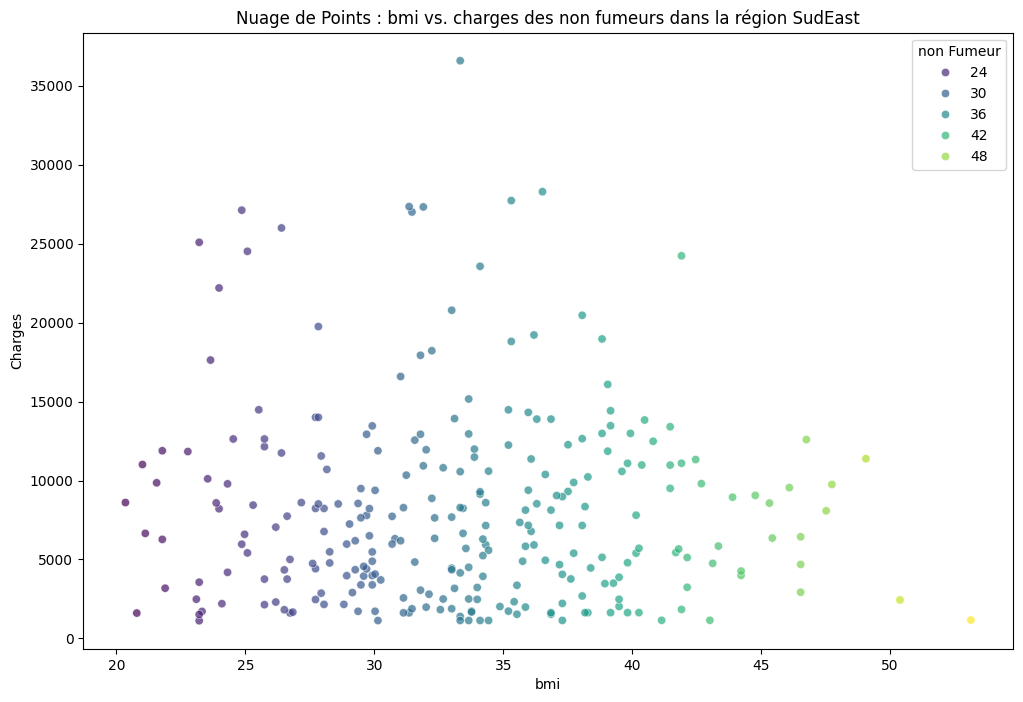

In [ ]:
regions = ['NordOuest', 'NordEast', 'SudOuest', 'SudEast']

for region in regions:
    
    data_subset = df[(df[region] == 1) & (df['smoker'] == 0)]

    plt.figure(figsize=(12, 8))
    scatter_plot = sns.scatterplot(x='bmi', y='charges', hue='bmi', palette='viridis', data=data_subset, sizes=(20, 200), alpha=0.7)

    plt.title(f'Nuage de Points : bmi vs. charges des non fumeurs dans la région {region}')
    plt.xlabel('bmi')
    plt.ylabel('Charges')

    scatter_plot.legend(title='non Fumeur')
    plt.show()

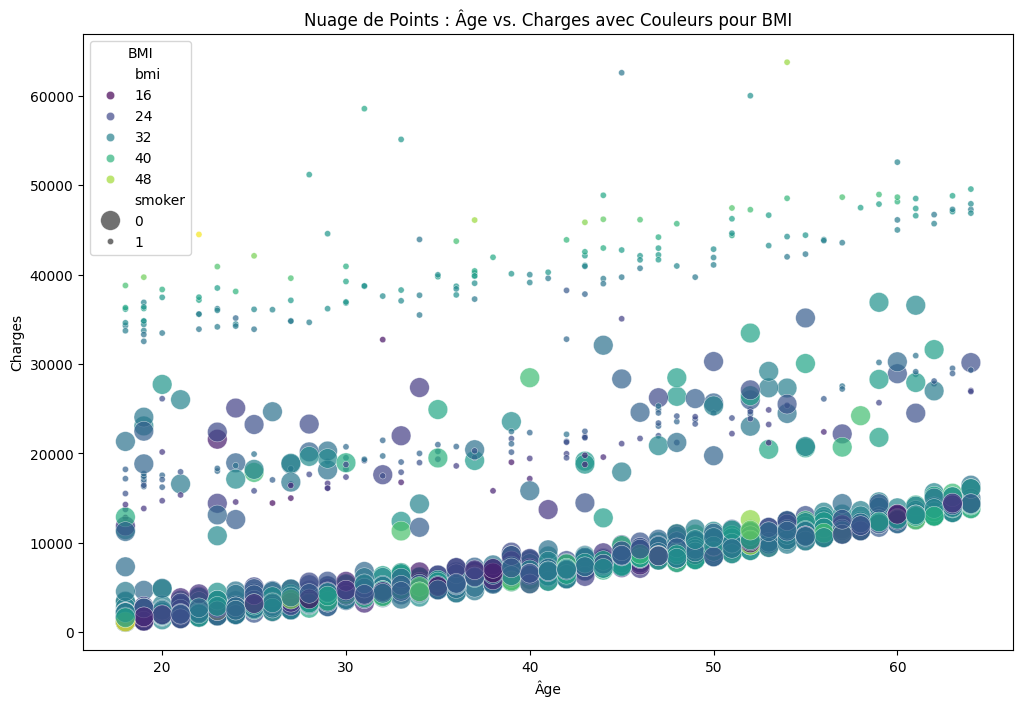

In [ ]:
# Création d'un nuage de points avec des couleurs pour le BMI
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='age', y='charges', hue='bmi', palette='viridis', data=df, size='smoker', sizes=(20, 200), alpha=0.7)

# Ajout de titres
plt.title('Nuage de Points : Âge vs. Charges avec Couleurs pour BMI')
plt.xlabel('Âge')
plt.ylabel('Charges')

# Ajout d'une légende pour la taille des points (BMI)
scatter_plot.legend(title='BMI')

# Affichage du graphique
plt.show()

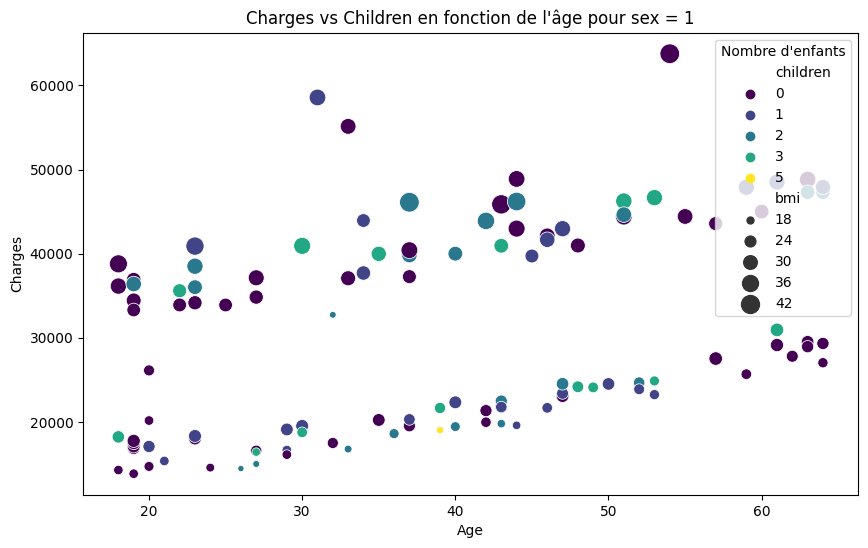

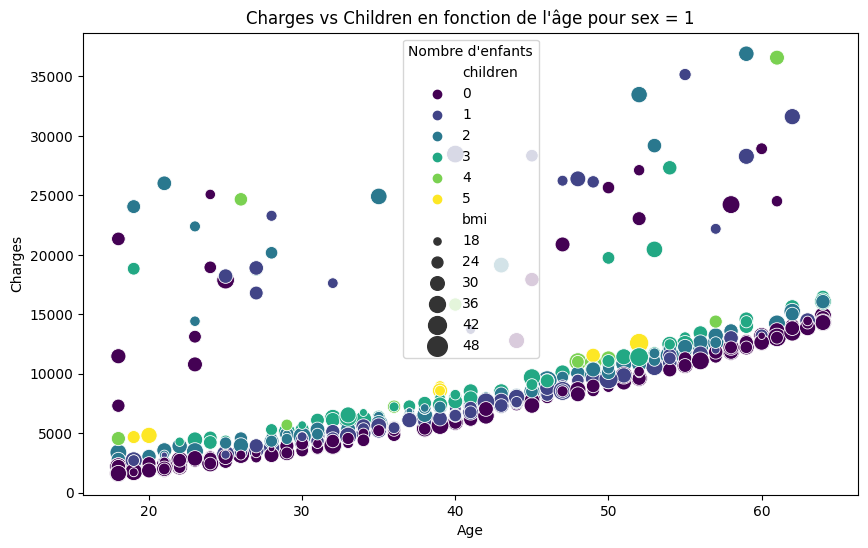

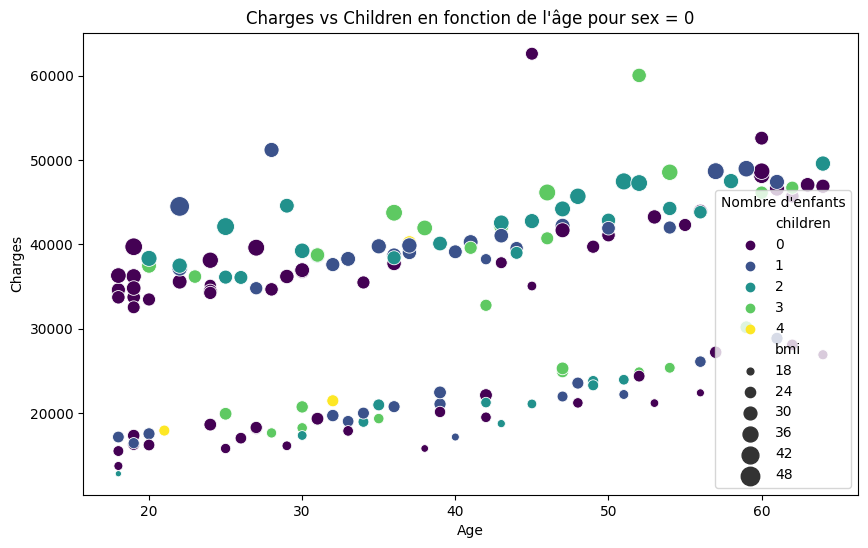

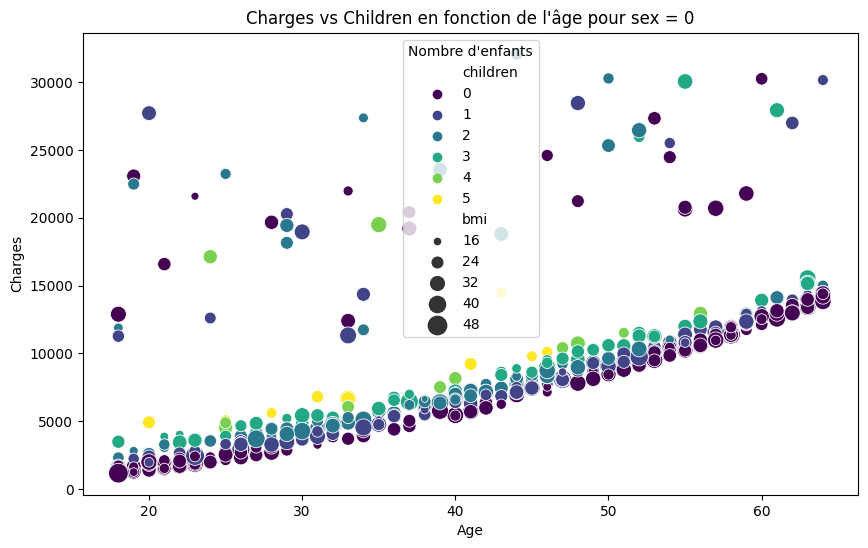

In [ ]:
unique_sex_values = df['sex'].unique()
unique_smoker_values = df['smoker'].unique()

for sex_value in unique_sex_values:
    for smoker_value in unique_smoker_values:        
        data_filter_df = df[(df['sex'] == sex_value) & (df['smoker'] == smoker_value)]        
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='age', y='charges', hue='children', data=data_filter_df, palette='viridis', size='bmi', sizes=(20, 200))
        plt.title(f"Charges vs Children en fonction de l'âge pour sex = {sex_value}")
        plt.xlabel('Age')
        plt.ylabel('Charges')
        plt.legend(title="Nombre d'enfants")
        plt.show()
       

In [53]:
# from sklearn.linear_model import ElasticNet
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# import numpy as np

# selected_features = ['smoker', 'age', 'bmi','sex','children']

# x = df[selected_features]
# y = df['charges']

# # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True, train_size=0.85, random_state=42, stratify=x['smoker'])


# model = ElasticNet(alpha=0.001, l1_ratio=1, random_state=42)
# model.fit(X_train, y_train)

# y_pred_elasticnet = model.predict(X_test)

# r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
# mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
# rmse_elasticnet = np.sqrt(mse_elasticnet)

# print("Performance avec ElasticNet:")
# print(f"R2 Score: {r2_elasticnet:.4f}")
# print(f"RMSE: {rmse_elasticnet:.2f}")




In [58]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import numpy as np

selected_features = ['smoker', 'age', 'bmi', 'sex', 'children']

x = df[selected_features]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True, train_size=0.85, random_state=42, stratify=x['smoker'])

# Utilisez RobustScaler pour centrer et réduire les variables explicatives de manière robuste
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = ElasticNet(alpha=0.001, l1_ratio=1, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred_elasticnet = model.predict(X_test_scaled)

r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
rmse_elasticnet = np.sqrt(mse_elasticnet)

print("Performance avec ElasticNet et RobustScaler:")
print(f"R2 Score: {r2_elasticnet:.2f}")
print(f"RMSE: {rmse_elasticnet:.2f}")


Performance avec ElasticNet et RobustScaler:
R2 Score: 0.79
RMSE: 5524.71


In [65]:
y_pred_train = model.predict(X_train)
# Calcul des résidus
residuals = y_pred_train - y_pred_elasticnet

# Centrer et réduire les variables explicatives
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)

# Calcul des leviers (hat values)
leverage = np.diag(X_scaled @ np.linalg.pinv(X_scaled.T @ X_scaled) @ X_scaled.T)

# Calcul de la distance de Cook
cooks_distance = residuals**2 / (model.coef_ @ model.coef_) / (1 - leverage)

cook_distances_with_indices = list(enumerate(cooks_distance, start=1))

# Tri par ordre décroissant en fonction des distances de Cook
sorted_cook_distances = sorted(cook_distances_with_indices, key=lambda x: x[1], reverse=True)

# Affichage de la distance de Cook pour chaque observation
for i, (observation, cook_distance) in enumerate(sorted_cook_distances):
    print(f'Rank {i + 1}: Observation {observation}, Cook\'s Distance = {cook_distance}')


ValueError: operands could not be broadcast together with shapes (1134,) (201,) 

In [ ]:
print(sorted_cook_distances)

[(1298, 1.544020070112972), (576, 1.2037749918492067), (243, 1.0091134977866816), (220, 0.9737148900025244), (817, 0.9712460711241304), (542, 0.9272012152407728), (515, 0.9268054104866601), (141, 0.9016826977604485), (1228, 0.8897315903154145), (934, 0.8847139062103918), (1025, 0.8415601046665537), (1204, 0.8229198508923053), (1017, 0.7935146851106126), (525, 0.736876353619861), (387, 0.7365095280296367), (1010, 0.7273205652104883), (35, 0.7169082735430308), (1037, 0.7092701574999752), (1006, 0.7039179687456119), (468, 0.6929663549112975), (1326, 0.6902498417002224), (430, 0.6865907039453492), (985, 0.6640882972640448), (597, 0.6430678996811743), (103, 0.6430410032150263), (322, 0.6113736002805297), (4, 0.5934449266555794), (686, 0.5669234566649424), (1140, 0.5563294227504371), (116, 0.556040629692487), (63, 0.5343775461650636), (10, 0.5212216770005094), (804, 0.4764371121804123), (874, 0.47146265572060825), (694, 0.4639932626925164), (355, 0.4528423560227172), (519, 0.4519750690711901

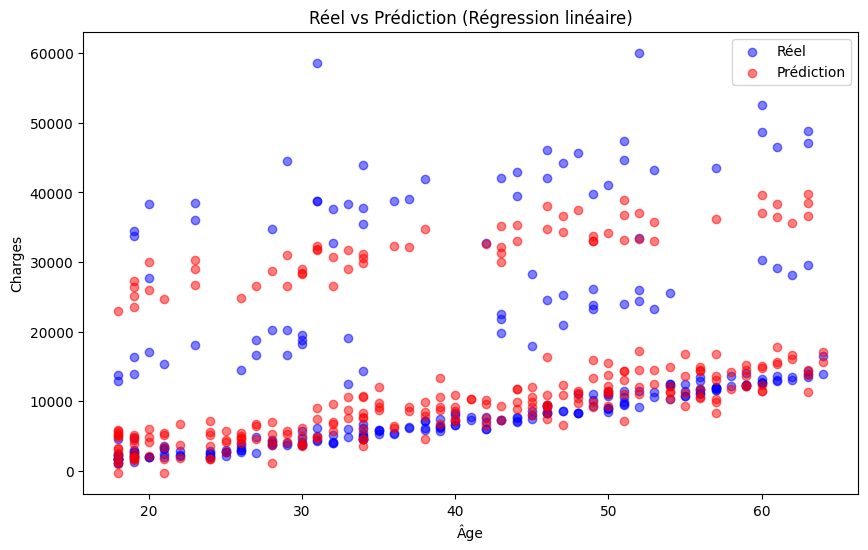

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test['age'], y_test, color='blue', label='Réel', alpha=0.5)
plt.scatter(X_test['age'], y_pred, color='red', label='Prédiction', alpha=0.5)

plt.title('Réel vs Prédiction (Régression linéaire)')
plt.xlabel('Âge')
plt.ylabel('Charges')
plt.legend()

plt.show()